In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis -- this time from SentiWords module

In [1]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import docx

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)


In [2]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_sentiwords_1_18_2023.csv", low_memory=False)
print(df)
df = df.sort_values("Textbook")

print(df)

                           Textbook     Score
0       Devo_Feldman_04_Autism.docx -0.348684
1       Socl_Zastrow_08_Autism.docx -0.261029
2       Socl_Zastrow_10_Autism.docx -0.219033
3       Socl_Zastrow_09_Autism.docx -0.215139
4    Intro_Bernstein_08_Autism.docx -0.204545
..                              ...       ...
203      Socl_Gruman_03_Autism.docx  0.100503
204     Intro_Griggs_05_Autism.docx  0.131045
205   Neuro_Reisberg_06_Autism.docx  0.133333
206     Intro_Griggs_04_Autism.docx  0.133758
207    Socl_Gilovich_03_Autism.docx  0.147887

[208 rows x 2 columns]
                          Textbook     Score
77    Abn_Barlow_04_Autism_v2.docx -0.017034
92    Abn_Barlow_05_Autism_v2.docx -0.004286
94    Abn_Barlow_06_Autism_v2.docx -0.003879
102      Abn_Barlow_07_Autism.docx -0.000712
57       Abn_Barlow_08_Autism.docx -0.029399
..                             ...       ...
60   Spcl_Vaughn_03_Autism_v2.docx -0.025627
195  Spcl_Vaughn_04_Autism_v2.docx  0.060125
189  Spcl_Vaughn_05

                          Textbook     Score Field  Author Edition     Slope
77    Abn_Barlow_04_Autism_v2.docx -0.017034   Abn  Barlow      04 -0.002116
92    Abn_Barlow_05_Autism_v2.docx -0.004286   Abn  Barlow      05 -0.002116
94    Abn_Barlow_06_Autism_v2.docx -0.003879   Abn  Barlow      06 -0.002116
102      Abn_Barlow_07_Autism.docx -0.000712   Abn  Barlow      07 -0.002116
57       Abn_Barlow_08_Autism.docx -0.029399   Abn  Barlow      08 -0.002116
..                             ...       ...   ...     ...     ...       ...
60   Spcl_Vaughn_03_Autism_v2.docx -0.025627  Spcl  Vaughn      03  0.012384
195  Spcl_Vaughn_04_Autism_v2.docx  0.060125  Spcl  Vaughn      04  0.012384
189  Spcl_Vaughn_05_Autism_v2.docx  0.050206  Spcl  Vaughn      05  0.012384
191  Spcl_Vaughn_06_Autism_v2.docx  0.055301  Spcl  Vaughn      06  0.012384
175     Spcl_Vaughn_07_Autism.docx  0.038703  Spcl  Vaughn      07  0.012384

[208 rows x 6 columns]


Text(0.5, 1.0, 'Scores by Field')

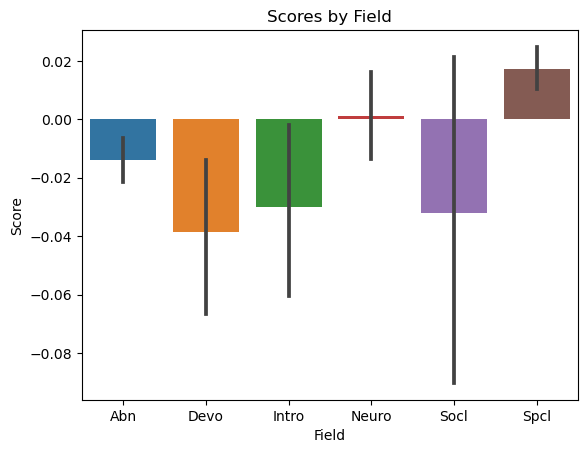

In [60]:
# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

fig, ax = plt.subplots()

print(field_df)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

Text(0.5, 1.0, 'Scores by Spcl Author')

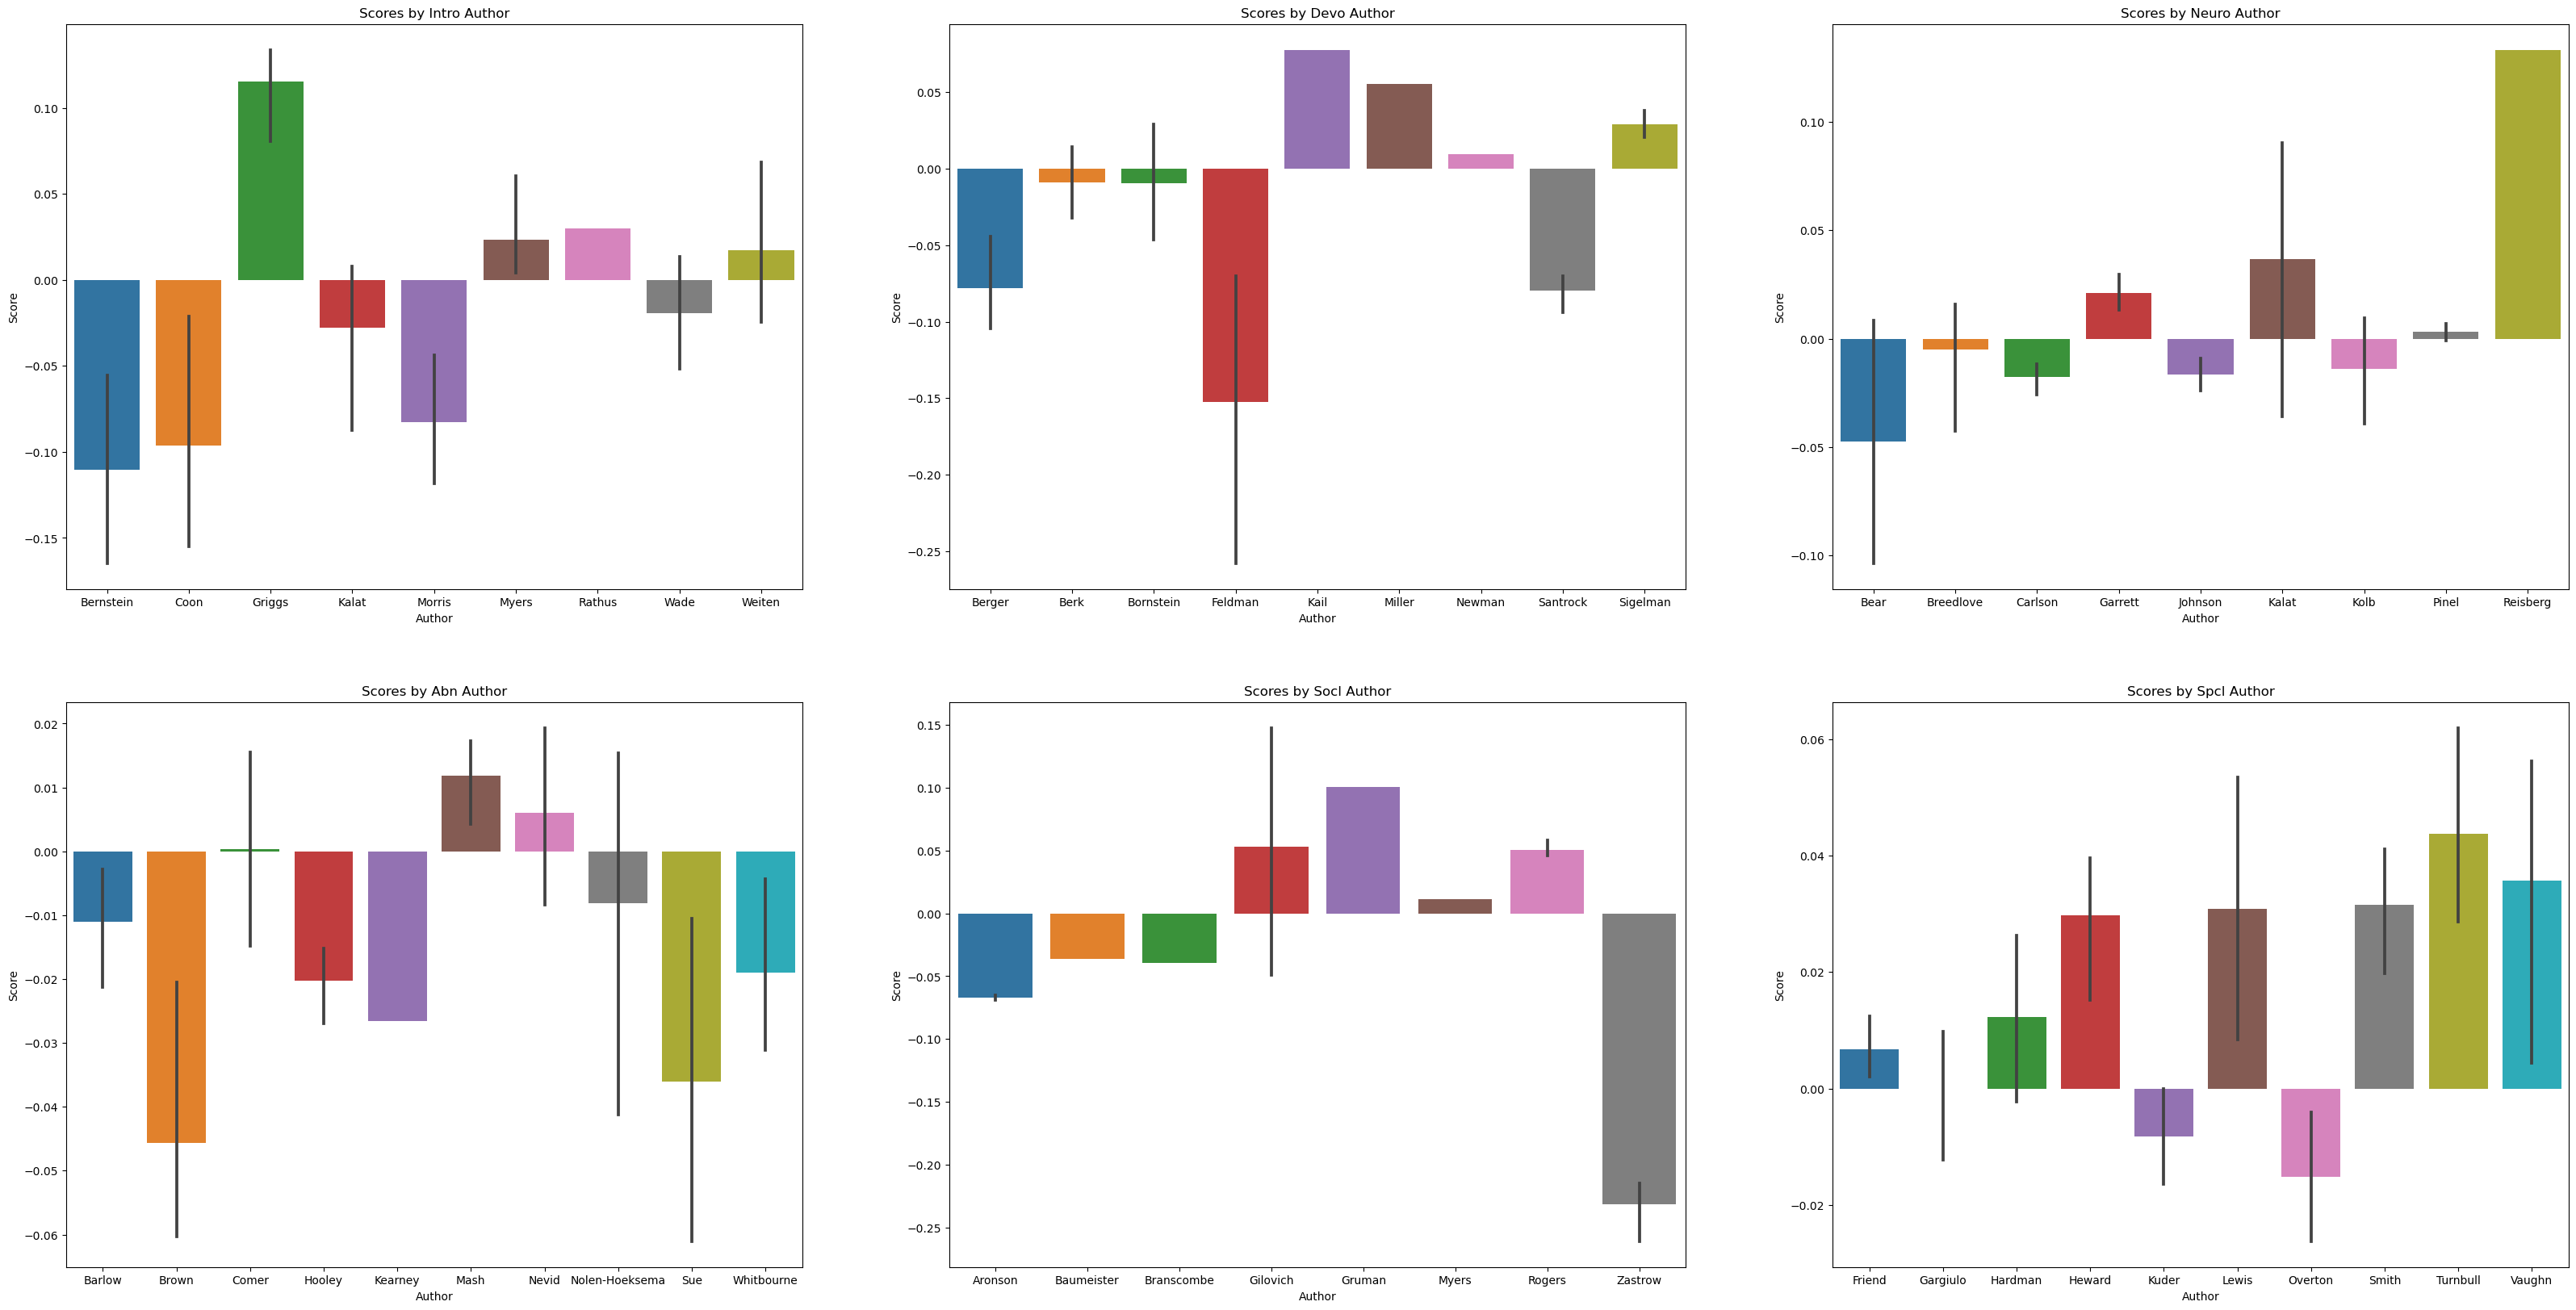

In [58]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df
# print(author_df)

all_authors = []

# authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
#                  "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Newman", "Santrock", 
#                  "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
#                  "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
#                  "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
#                  "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn"]

# summy = 0
for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
#     print(author_l)
#     summy += len(author_l)
    all_authors.append(author_l)
    
# print(summy)
# # Find average score per field

# author_means = []
# for a_df in all_authors:
#     author_name = ""
#     field = ""
#     for author in authors:
#         if len(a_df[a_df["Textbook"].str.contains(author)]) > 0:
#             author_name = author 
#             if len(a_df[a_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
#                 chunk = author_df[author_df["Textbook"].str.contains(author)]
#                 line = chunk["Textbook"].values[0]
#                 field = line.split("_")[0]
#     author_mean =  a_df["Score"].mean()
#     author_means.append([author_name, field, author_mean])
    
# author_means_df = pd.DataFrame(author_means, columns=["Author", "Field", "Mean_Score"])
# author_means_df = author_means_df.sort_values("Mean_Score")

# print(author_means_df)

author_means_df = author_df

fig, ax = plt.subplots(2, 3, figsize = (40,20))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][2],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][2],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Intro Author")
ax[0][1].set_title("Scores by Devo Author")
ax[0][2].set_title("Scores by Neuro Author")
ax[1][0].set_title("Scores by Abn Author")
ax[1][1].set_title("Scores by Socl Author")
ax[1][2].set_title("Scores by Spcl Author")

C:\Users\maksi\AppData\Local\Temp\ipykernel_21152\3015737611.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_21152\3015737611.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_21152\3015737611.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

                          Textbook     Score Field       Author Edition  \
77    Abn_Barlow_04_Autism_v2.docx -0.017034   Abn   Abn_Barlow      04   
92    Abn_Barlow_05_Autism_v2.docx -0.004286   Abn   Abn_Barlow      05   
94    Abn_Barlow_06_Autism_v2.docx -0.003879   Abn   Abn_Barlow      06   
102      Abn_Barlow_07_Autism.docx -0.000712   Abn   Abn_Barlow      07   
57       Abn_Barlow_08_Autism.docx -0.029399   Abn   Abn_Barlow      08   
..                             ...       ...   ...          ...     ...   
60   Spcl_Vaughn_03_Autism_v2.docx -0.025627  Spcl  Spcl_Vaughn      03   
195  Spcl_Vaughn_04_Autism_v2.docx  0.060125  Spcl  Spcl_Vaughn      04   
189  Spcl_Vaughn_05_Autism_v2.docx  0.050206  Spcl  Spcl_Vaughn      05   
191  Spcl_Vaughn_06_Autism_v2.docx  0.055301  Spcl  Spcl_Vaughn      06   
175     Spcl_Vaughn_07_Autism.docx  0.038703  Spcl  Spcl_Vaughn      07   

        Slope  
77  -0.002116  
92  -0.002116  
94  -0.002116  
102 -0.002116  
57  -0.002116  
.. 

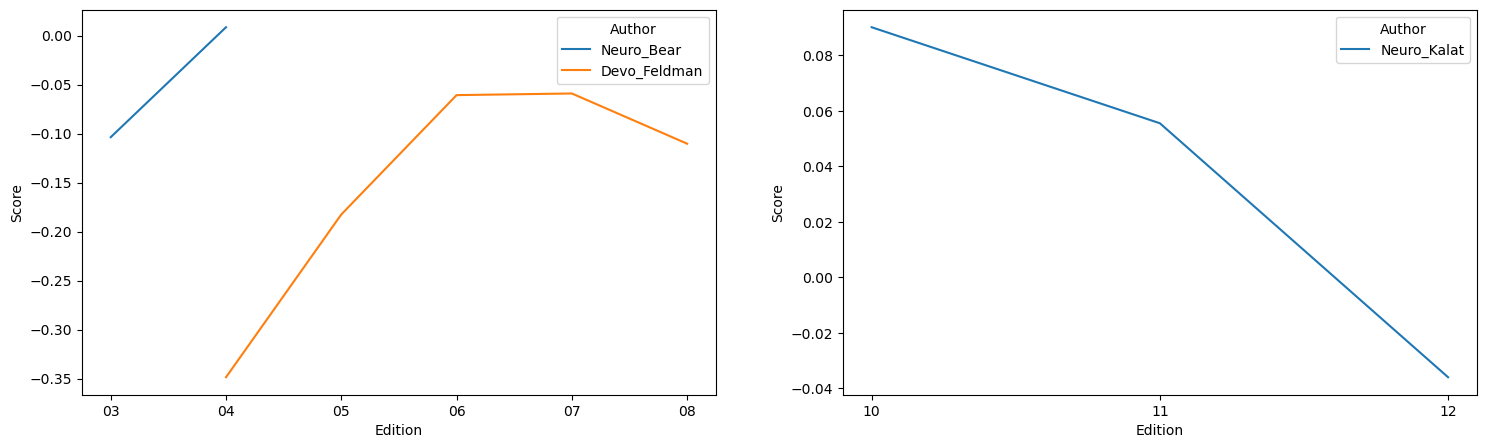

In [59]:
# Edition Analysis

edition_df = df

# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
#     print(a_df)
    res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
    for l in alphabetical:
        if len(alphabetical) > 1:
            slope.append(res.slope)
        else:
            slope.append(0)
#     if len(a_df) > 1 and res.slope < -0.01:
#         sns.lineplot(data=a_df, x="Edition", y="Score")


edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope
print(edition_df)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] > 0.055]
high = high.sort_values("Edition")
print(high)
# axes[0].set_xticks(range(len(high)))
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high, sort=False)

low = edition_df[edition_df["Slope"] <= -0.055]
h = sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

plt.show()


      Year     Score
1988  1988  0.037671
1992  1992  0.048263
1995  1995 -0.051220
1996  1996 -0.038832
1997  1997 -0.022956
1998  1998 -0.010510
1999  1999 -0.076923
2000  2000 -0.016344
2001  2001 -0.018759
2002  2002 -0.006577
2003  2003  0.000080
2004  2004  0.005510
2005  2005 -0.051513
2006  2006 -0.025869
2007  2007 -0.043084
2008  2008 -0.016325
2009  2009 -0.059531
2010  2010 -0.008640
2011  2011 -0.018275
2012  2012  0.000124
2013  2013  0.009557
2014  2014 -0.009481
2015  2015 -0.017614
2016  2016  0.015669
2017  2017 -0.026071
2018  2018  0.022689


Text(0.5, 1.0, 'Mean Textbook Score Throughout Years')

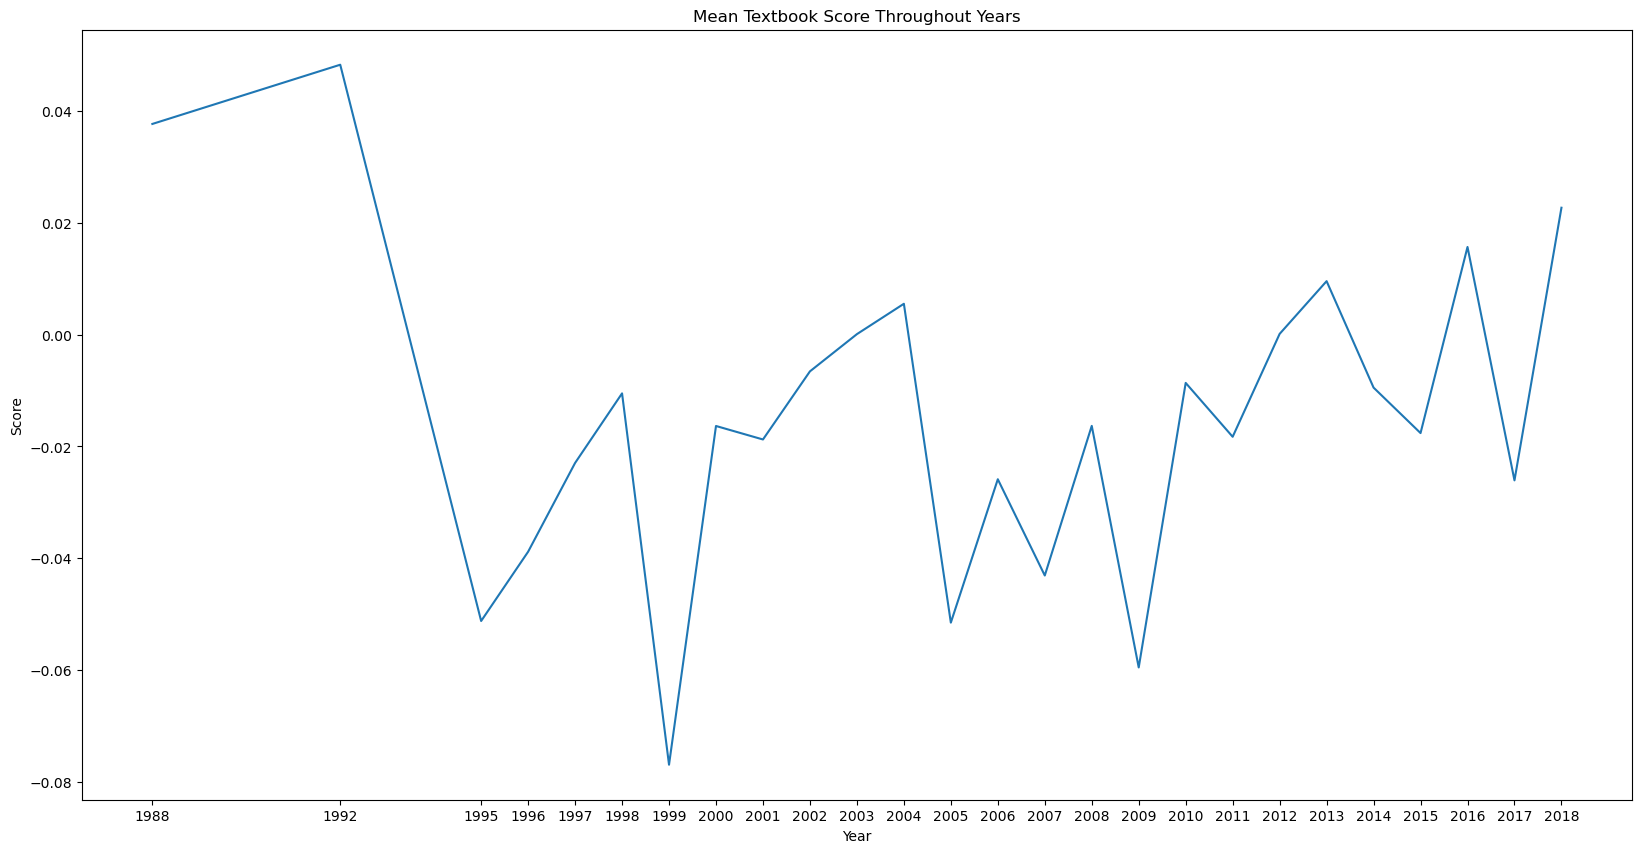

In [7]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
#     print(book)
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    year = no_parentheses.split(",")[1]
#     print(year)
    year = int(year)
    book_years[book] = year

# print(book_years)

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    
# print(year_textbooks)

# Find mean of the books in each year

# print(year_df)
year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# print(year_scores)

# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

print(graphing_years)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")

In [8]:
# Does length of passage matter?

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with text for all the books, minus the titles
title_text = {}
for book in textbooks:
    total_text = getText(book)
    text_without_title = total_text[4:]
    for piece in text_without_title:
        if piece == '':
            text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
#     text_without_title.remove('')
    title_text[book] = text_without_title
    
    
# Remove stop words from each book

stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

os.chdir(stopwords_dir)

f = open("stop_words_english_original.txt", "r", encoding="utf-8")
stopwords = []
for text in f:
    text = text.replace('\n', '')
    stopwords.append(text)


punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# Function to clean up text and remove stopwords
def clean(book):
    text_list = title_text[book]
    new_text_list = []
    
    # Clean up text
    for text in text_list:
        text = text.strip()
        text = text.lower()
        text = text.split(' ')
        new_text_list.append(text)


    newer_text_list = []
    
    # Remove punctuation
    for sentence in new_text_list:
        for word in sentence:
            for char in punc:
                if char in word:
                    word = word.replace(char, '')
            newer_text_list.append(word)
                
    # Remove stop words
    newest_text_list = []
    for words in newer_text_list:
        if words not in stopwords:
            newest_text_list.append(words)

    # Remove blanks
    for w in newest_text_list:
        if len(w) == 0:
            newest_text_list.remove(w)
            
    return newest_text_list

# Update all the books with their clean, stopword-less counterparts

clean_texts = {}
for book in title_text:
    newest_text_list = clean(book)
    clean_texts[book] = newest_text_list
    
# Find length of all texts
lengths = {}
for book in clean_texts:
    length_of_text = len(clean_texts[book])
    lengths[book] = length_of_text
    
print(lengths)



{'Abn_Barlow_04_Autism_v2.docx': 3118, 'Abn_Barlow_05_Autism_v2.docx': 2556, 'Abn_Barlow_06_Autism_v2.docx': 2421, 'Abn_Barlow_07_Autism.docx': 2132, 'Abn_Barlow_08_Autism.docx': 4852, 'Abn_Brown_01_Autism_v2.docx': 1813, 'Abn_Brown_02_Autism_v2.docx': 1853, 'Abn_Brown_03_Autism_v2.docx': 1755, 'Abn_Brown_04_Autism_v2.docx': 1823, 'Abn_Brown_05_Autism.docx': 1791, 'Abn_Comer_05_Autism_v2.docx': 1454, 'Abn_Comer_06_Autism_v2.docx': 2327, 'Abn_Comer_07_Autism_v2.docx': 2421, 'Abn_Comer_08_Autism_v2.docx': 2001, 'Abn_Comer_09_Autism.docx': 2498, 'Abn_Hooley_13_Autism_v2.docx': 1753, 'Abn_Hooley_14_Autism_v2.docx': 1660, 'Abn_Hooley_15_Autism_v2.docx': 1948, 'Abn_Hooley_16_Autism_v2.docx': 1656, 'Abn_Hooley_17_Autism.docx': 2285, 'Abn_Kearney_06_Autism.docx': 1181, 'Abn_Mash_02_Autism_v2.docx': 7464, 'Abn_Mash_03_Autism_v2.docx': 7286, 'Abn_Mash_04_Autism_v2.docx': 7860, 'Abn_Mash_05_Autism_v2.docx': 9689, 'Abn_Mash_06_Autism.docx': 13131, 'Abn_Nevid_06_Autism_v2.docx': 1321, 'Abn_Nevid_07

In [9]:
print(max(lengths.values()))
print(list(lengths.keys())[list(lengths.values()).index(13131)])

df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

13131
Abn_Mash_06_Autism.docx


                          Textbook     Score Edition       Author     Slope  \
77    Abn_Barlow_04_Autism_v2.docx -0.017034      04   Abn_Barlow -0.002116   
92    Abn_Barlow_05_Autism_v2.docx -0.004286      05   Abn_Barlow -0.002116   
94    Abn_Barlow_06_Autism_v2.docx -0.003879      06   Abn_Barlow -0.002116   
102      Abn_Barlow_07_Autism.docx -0.000712      07   Abn_Barlow -0.002116   
57       Abn_Barlow_08_Autism.docx -0.029399      08   Abn_Barlow -0.002116   
..                             ...       ...     ...          ...       ...   
60   Spcl_Vaughn_03_Autism_v2.docx -0.025627      03  Spcl_Vaughn  0.012384   
195  Spcl_Vaughn_04_Autism_v2.docx  0.060125      04  Spcl_Vaughn  0.012384   
189  Spcl_Vaughn_05_Autism_v2.docx  0.050206      05  Spcl_Vaughn  0.012384   
191  Spcl_Vaughn_06_Autism_v2.docx  0.055301      06  Spcl_Vaughn  0.012384   
175     Spcl_Vaughn_07_Autism.docx  0.038703      07  Spcl_Vaughn  0.012384   

    Field  
77    Abn  
92    Abn  
94    Abn  
102

Text(0.5, 1.0, 'Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)')

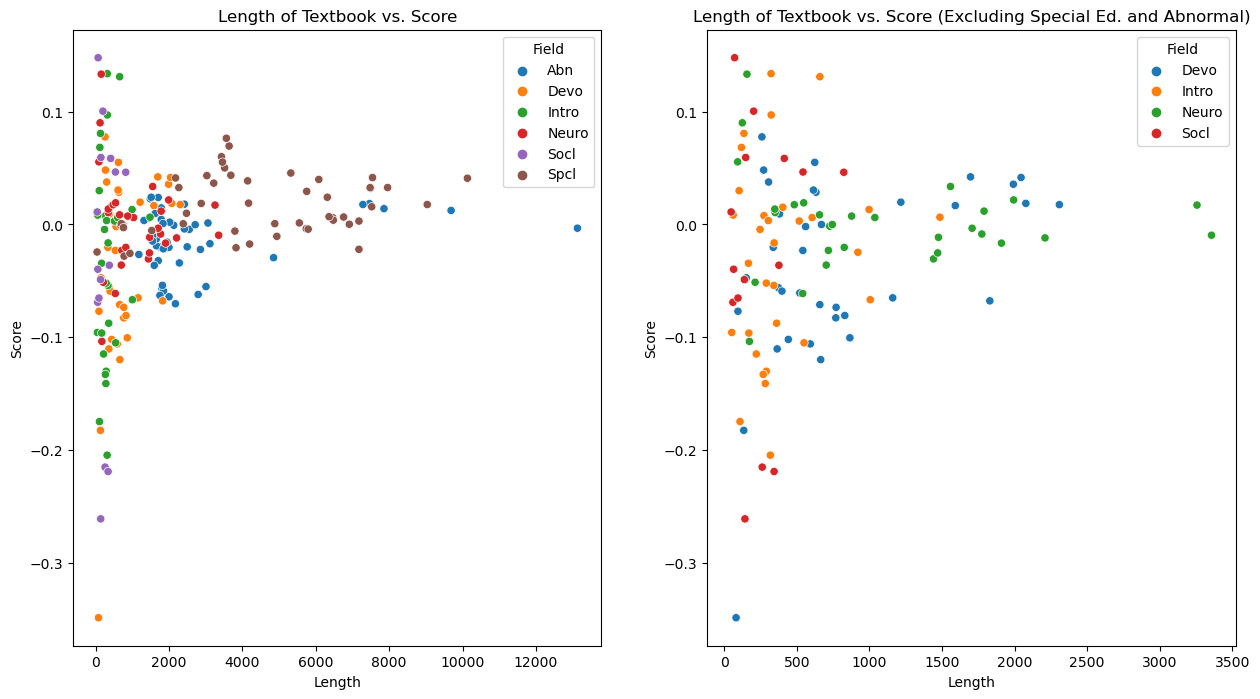

In [10]:
length_df = df

print(length_df)

# Add the lengths of the books to the dataframe
length_df["Length"] = length_df["Textbook"].map(lengths)

# Correlation between score and length?
fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
ax[0].set_title("Length of Textbook vs. Score")

# Remove special education and abnormal
secondary_df = length_df[length_df["Field"] != "Spcl"]
tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [11]:
# # What about raw scores and length?
# os.chdir(results_dir)

# raw_df = pd.read_csv("raw_sentiments_01_04_2024.csv", low_memory=False)

# print(raw_df)

# raw_df["Length"] = length_df["Length"]
# raw_df["Field"] = length_df["Field"]

# # length_df2 = length_df

# # # Add the lengths of the books to the dataframe
# # length_df2["Raw_Score"] = raw_df["Raw_Score"].map(books)

# # print(length_df2)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 4)) 

# sns.scatterplot(ax=ax[0], data=raw_df, x="Length", y="Raw_Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Raw Score")

# # Remove special education and abnormal
# secondary_df2 = raw_df[raw_df["Field"] != "Spcl"]
# tertiary_df2 = secondary_df2[secondary_df2["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df2, x="Length", y="Raw_Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)")

                          Textbook     Score Edition       Author     Slope  \
77    Abn_Barlow_04_Autism_v2.docx -0.017034      04   Abn_Barlow -0.002116   
92    Abn_Barlow_05_Autism_v2.docx -0.004286      05   Abn_Barlow -0.002116   
94    Abn_Barlow_06_Autism_v2.docx -0.003879      06   Abn_Barlow -0.002116   
102      Abn_Barlow_07_Autism.docx -0.000712      07   Abn_Barlow -0.002116   
57       Abn_Barlow_08_Autism.docx -0.029399      08   Abn_Barlow -0.002116   
..                             ...       ...     ...          ...       ...   
60   Spcl_Vaughn_03_Autism_v2.docx -0.025627      03  Spcl_Vaughn  0.012384   
195  Spcl_Vaughn_04_Autism_v2.docx  0.060125      04  Spcl_Vaughn  0.012384   
189  Spcl_Vaughn_05_Autism_v2.docx  0.050206      05  Spcl_Vaughn  0.012384   
191  Spcl_Vaughn_06_Autism_v2.docx  0.055301      06  Spcl_Vaughn  0.012384   
175     Spcl_Vaughn_07_Autism.docx  0.038703      07  Spcl_Vaughn  0.012384   

    Field  Length  Year  
77    Abn    3118  2004  

<Axes: xlabel='Year', ylabel='Score'>

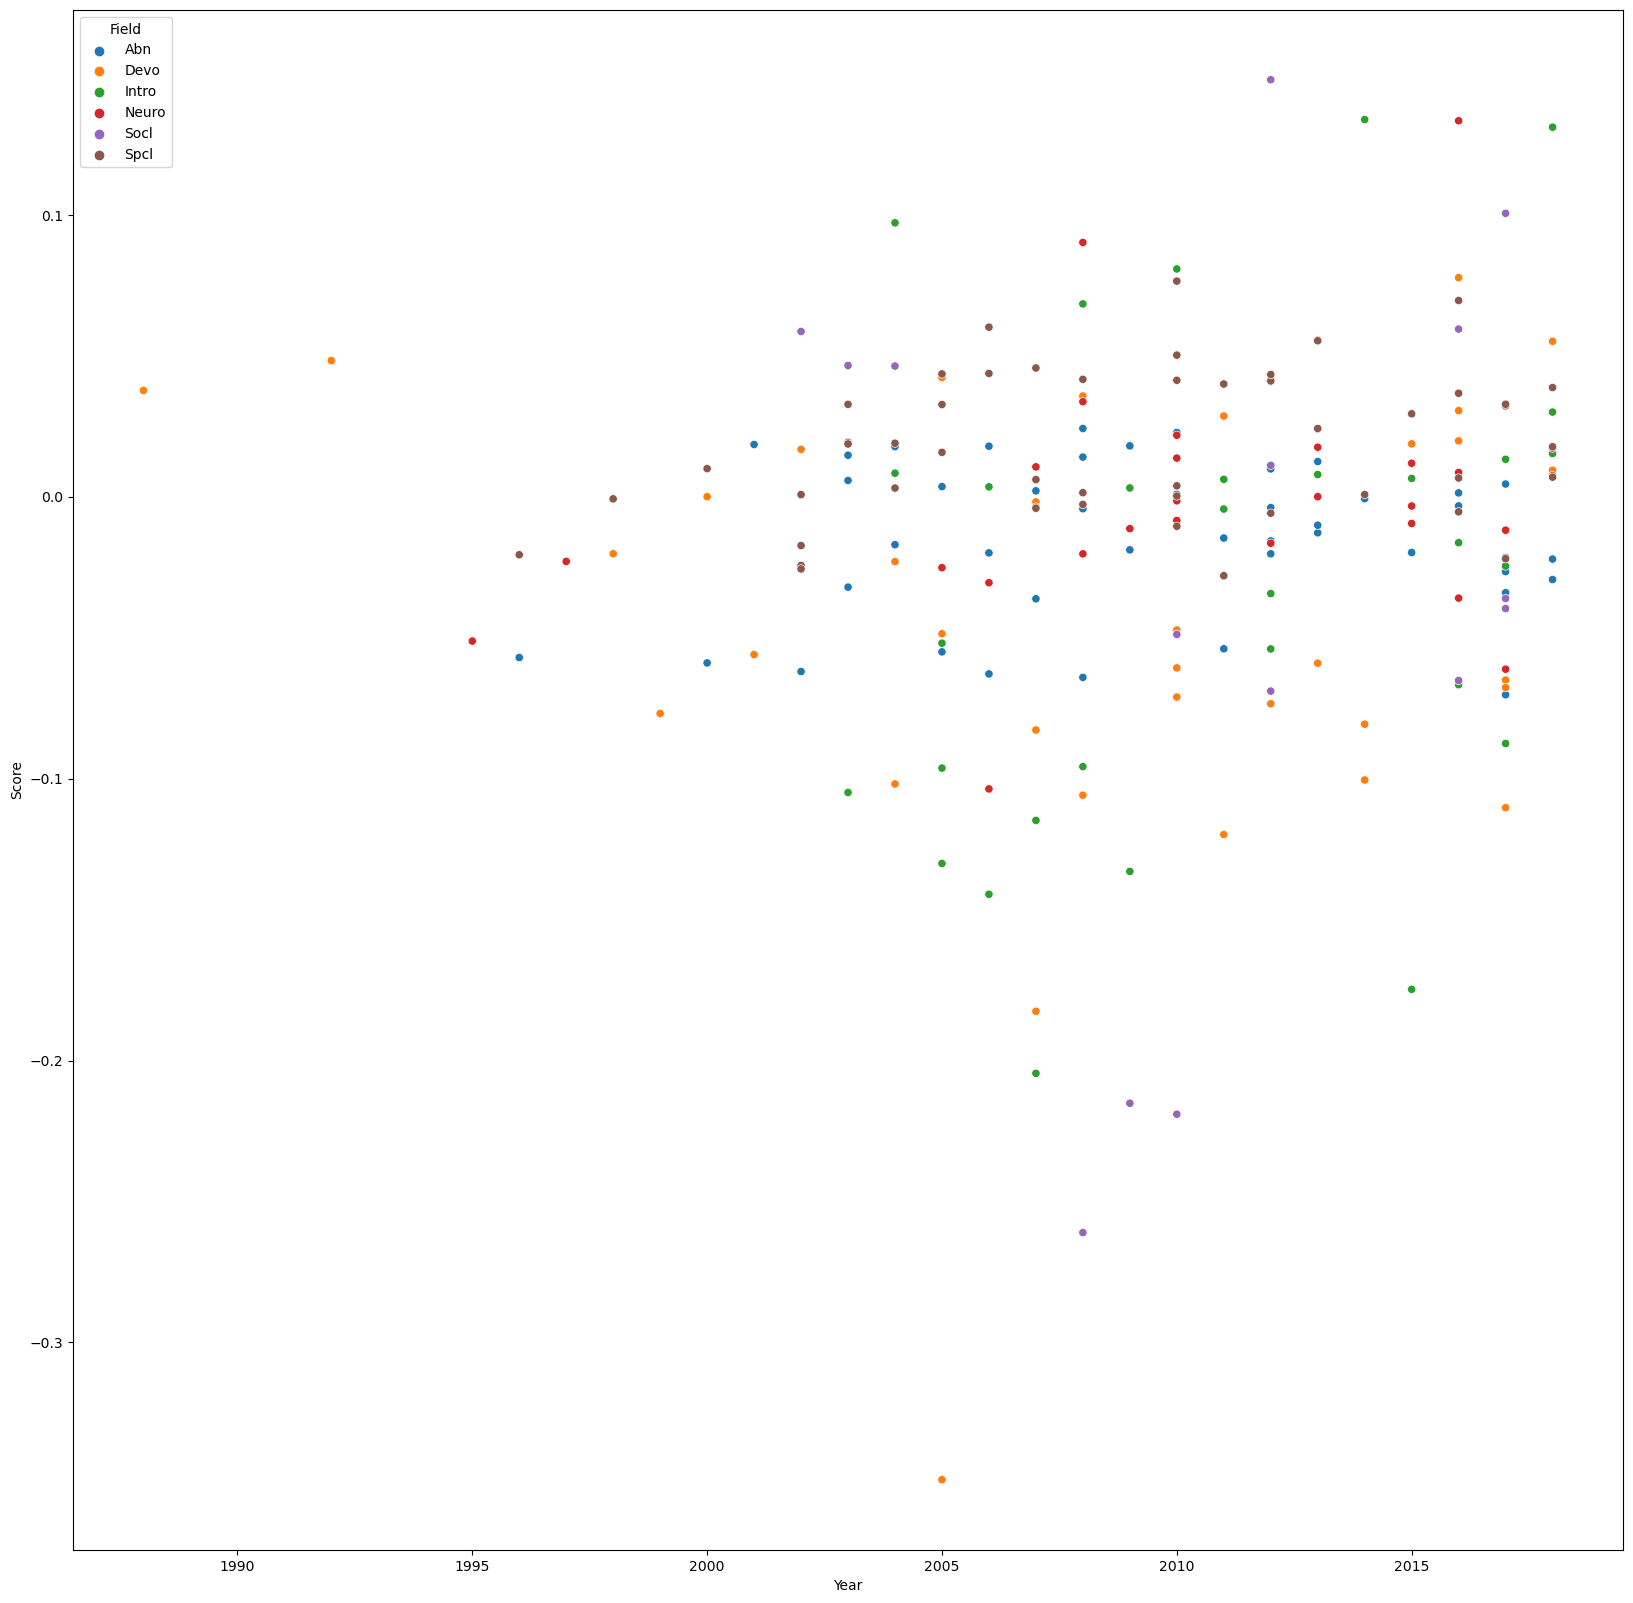

In [12]:
# Overall

overall_df = df

overall_df["Year"] = overall_df["Textbook"].map(book_years)

# # Turn author_means into a dictionary so we can get the fields
# author_means_dict = {}
# for author in author_means:
#     author_means_dict[author[0]] = author[1] 
    
# print(author_means_dict)
    
# overall_df["Field"] = overall_df["Author"].map(author_means_dict)

fields = []
for author in overall_df["Author"]:
    field = author.split("_")[0]
    fields.append(field)

overall_df["Field"] = fields

print(overall_df)

fig, ax = plt.subplots(figsize=(20,20))

sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")